In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import os
import time

from fonction import *

In [2]:
def resize_img(height,width,img_dir,values):
    dim = (width, height)
    try:
        img=Image.open(img_dir+ values + ".jpg")
    except Exception as e:
        img=Image.open(img_dir+ values + ".jpeg")
    mat_img=np.array(img)
    resized = cv2.resize(mat_img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [3]:
def sift_model(df,label,img_dir,height,width):
    img_array=[]
    img_resize=[]
    img_name=[]
    for indice,values in enumerate(df[label]):
        resized = resize_img(height,width,img_dir,values)
        img_resize.append(resized)
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        
        sift = cv2.xfeatures2d.SIFT_create()
        kp, des = sift.detectAndCompute(resized,None)
        img_name.append(values)
        if des is not None:
            img_array.append(des)
            
    return img_array,img_resize,img_name

In [4]:
df=pd.read_csv("df_text_final.csv")

In [5]:
df.head()

,uniq_id,product_name,description_caller,category_1,description_bow_lem,description_dl,description_product_bow_lem,description_product_dl,length_bow,length_dl,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,"['key', 'feature', 'elegance', 'polyester', 'm...","['key', 'features', 'of', 'elegance', 'polyest...","['elegance', 'polyester', 'multicolor', 'abstr...","['elegance', 'polyester', 'multicolor', 'abstr...",467,749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,"['specification', 'sathiyas', 'cotton', 'bath'...","['specifications', 'of', 'sathiyas', 'cotton',...","['sathiyas', 'cotton', 'bath', 'towel', 'speci...","['sathiyas', 'cotton', 'bath', 'towel', 'speci...",190,258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,"['key', 'feature', 'eurospa', 'cotton', 'terry...","['key', 'features', 'of', 'eurospa', 'cotton',...","['eurospa', 'cotton', 'terry', 'face', 'towel'...","['eurospa', 'cotton', 'terry', 'face', 'towel'...",473,779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,"['key', 'feature', 'santosh', 'royal', 'fashio...","['key', 'features', 'of', 'santosh', 'royal', ...","['santosh', 'royal', 'fashion', 'cotton', 'pri...","['santosh', 'royal', 'fashion', 'cotton', 'pri...",343,448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,"['key', 'feature', 'jaipur', 'print', 'cotton'...","['key', 'features', 'of', 'jaipur', 'print', '...","['jaipur', 'print', 'cotton', 'floral', 'king'...","['jaipur', 'print', 'cotton', 'floral', 'king'...",468,694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df[df['uniq_id']=='9743e6d1c9f3180483825fe4d2e97836']

,uniq_id,product_name,description_caller,category_1,description_bow_lem,description_dl,description_product_bow_lem,description_product_dl,length_bow,length_dl,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
343,9743e6d1c9f3180483825fe4d2e97836,Apple AirPort Express Base Station Wireless Ro...,Buy Apple AirPort Express Base Station Wireles...,Computers,"['buy', 'apple', 'airport', 'express', 'base',...","['buy', 'apple', 'airport', 'express', 'base',...","['apple', 'airport', 'express', 'base', 'stati...","['apple', 'airport', 'express', 'base', 'stati...",61,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### bag of features 

In [7]:
img_dir = r'C:\Users\cardn\P6_Huamani_Luis_2\Dataset+projet+pretraitement+textes+images\Flipkart\Images/'

In [8]:
img_array,img_resize,img_name=sift_model(df,'uniq_id',img_dir,224,224)

C:\Users\cardn\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [9]:
## On recupere les noms des categories 
category = df['category_1'].sort_values().unique()
category  

array(['Baby Care ', 'Beauty and Personal Care ', 'Computers ',
       'Home Decor & Festive Needs ', 'Home Furnishing ',
       'Kitchen & Dining ', 'Watches '], dtype=object)

In [10]:
sift_keypoints_by_img = np.asarray(img_array)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

C:\Users\cardn\AppData\Local\Temp\ipykernel_13460\1100770493.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(img_array)


In [11]:
kmax = np.size(category) * 10

In [12]:
kmeans=kmeans_model(category,img_dir,sift_keypoints_all,7)

C:\Users\cardn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=5
  warnings.warn(


In [13]:
# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

In [14]:
l_cat = list(set(df["category_1"]))
y_cat_num = [(1-l_cat.index(df.iloc[i]['category_1'])) for i in range(len(df))]

In [15]:
l_cat

['Baby Care ',
 'Beauty and Personal Care ',
 'Home Decor & Festive Needs ',
 'Computers ',
 'Home Furnishing ',
 'Watches ',
 'Kitchen & Dining ']

In [16]:
ARI, X_tsne, labels=ARI_fct(df,'category_1',im_features)

ARI :  0.0244 time :  8.0


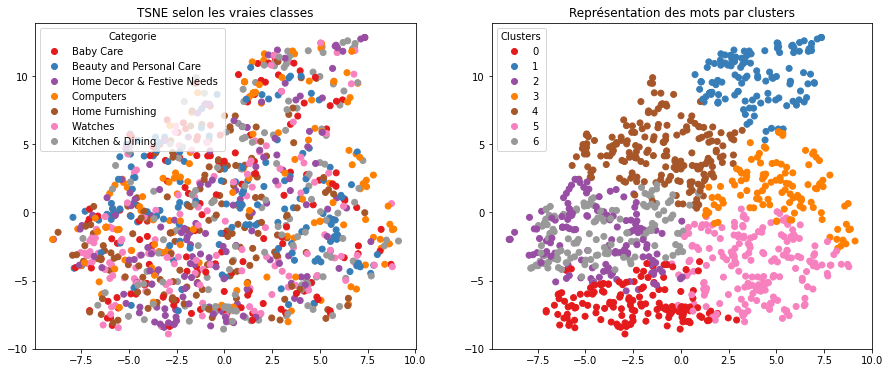

ARI :  0.0244


In [17]:
TSNE_visu_fct(df,'category_1',X_tsne, labels, ARI,'TSNE selon les vraies classes')

On observe que la creation des cluster a partir des images n'est pas suffisant pour repondre au besoin, on observe que les cluster se chevauchent, et aucun vrai cluster est defini il faudrait donc appliquer une autre methode que le Kmeans, ce pour cela que dans la dernier partir on appliquera un algorithme CNN.